#  Stock Market Analysis

We'll be analyzing stock data related to a few car companies (Tesla , Ford , General Motors), from Jan 1 2012 to Jan 1 2017. 

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [2]:
#importing Data
tesla = pd.read_csv('Tesla_Stock.csv' , index_col = 'Date' , parse_dates = True)
tesla.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951
2012-01-10,27.44,27.76,27.25,27.62,671732
2012-01-11,27.62,28.38,27.30,28.23,672239
2012-01-12,28.48,28.62,27.80,28.25,729300
2012-01-13,28.40,28.50,22.64,22.79,5506439


In [3]:
ford = pd.read_csv('Ford_Stock.csv' , index_col = 'Date' , parse_dates = True)
ford.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467
2012-01-10,12.00,12.05,11.63,11.80,121750545
2012-01-11,11.74,12.18,11.65,12.07,63806007
2012-01-12,12.16,12.18,11.89,12.14,48687666
2012-01-13,12.01,12.08,11.84,12.04,46388677


In [4]:
gm = pd.read_csv('GM_Stock.csv' , index_col = 'Date' , parse_dates = True) 
gm.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714
2012-01-10,23.22,23.40,22.78,23.24,13538355
2012-01-11,23.37,24.64,23.34,24.47,21946958
2012-01-12,24.35,24.82,23.76,24.67,16751370
2012-01-13,24.27,24.65,23.91,24.29,12964715


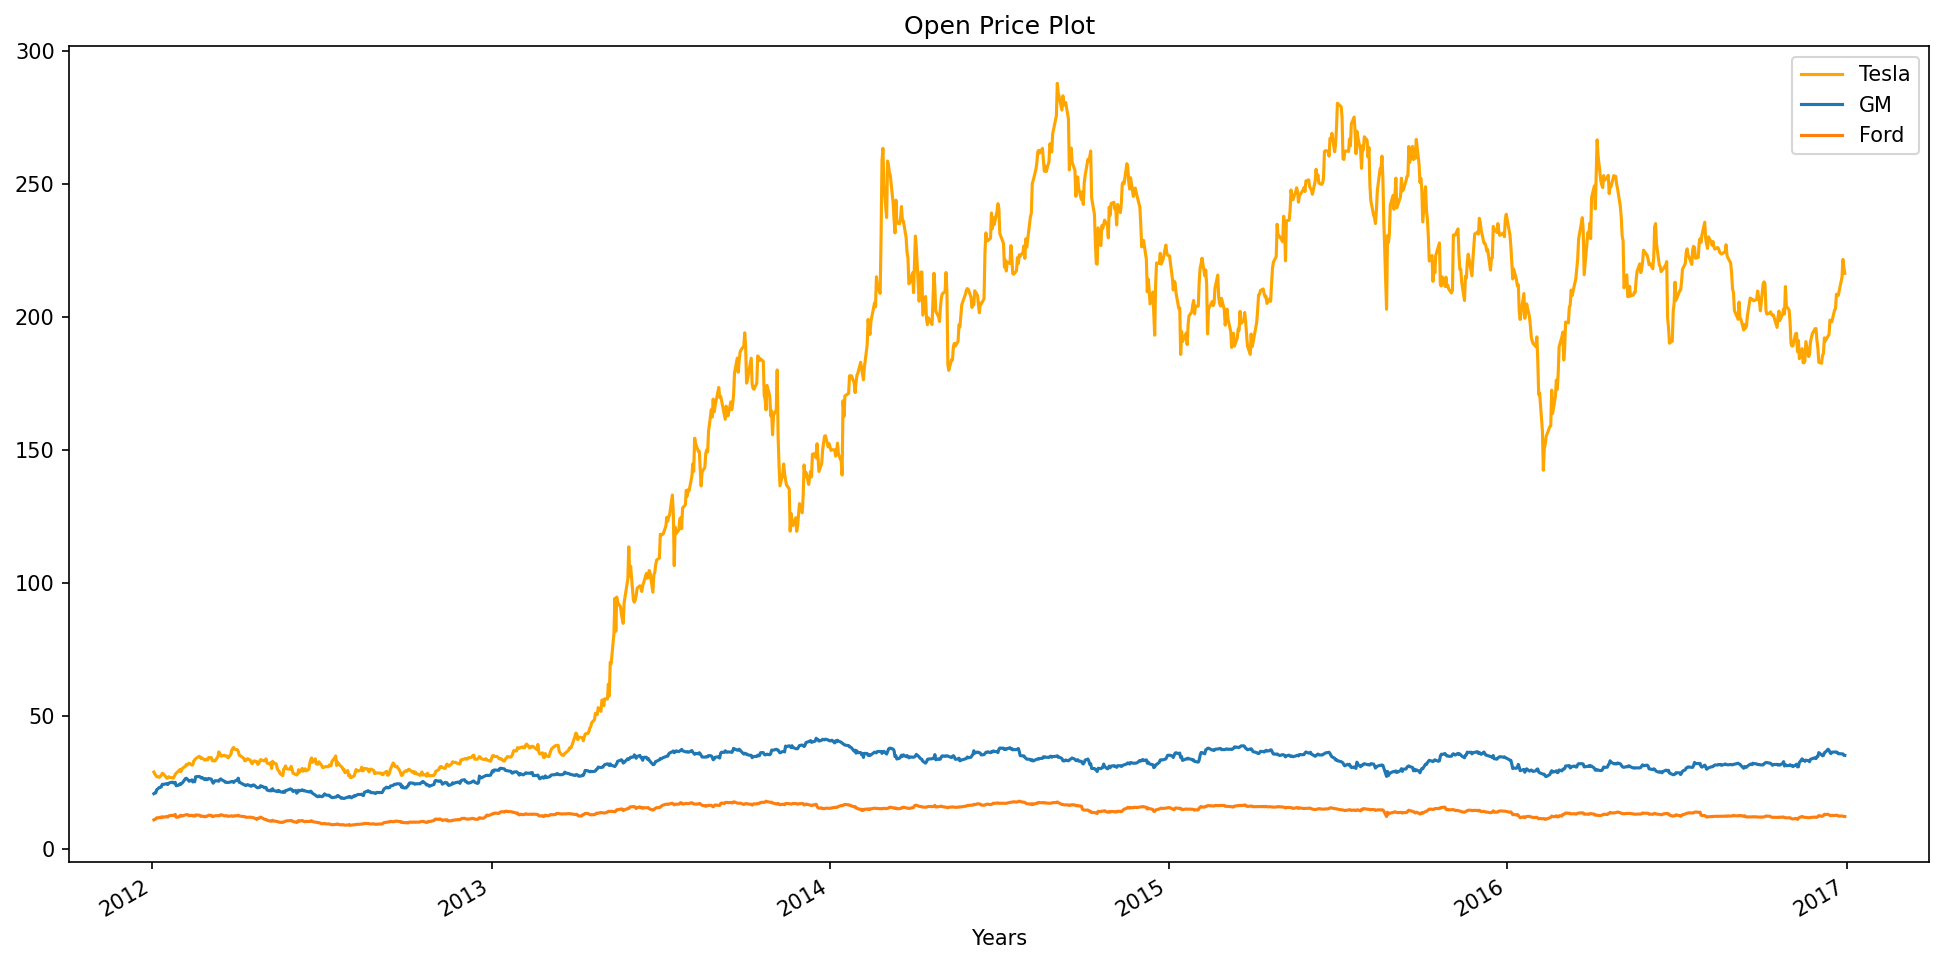

In [5]:
#Visualizing The Open Price of all the stocks
plt.figure(figsize = (16,8) , dpi = 150)
tesla['Open'].plot(label='Tesla' , color = 'orange')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.title('Open Price Plot')
plt.xlabel('Years')
plt.legend();

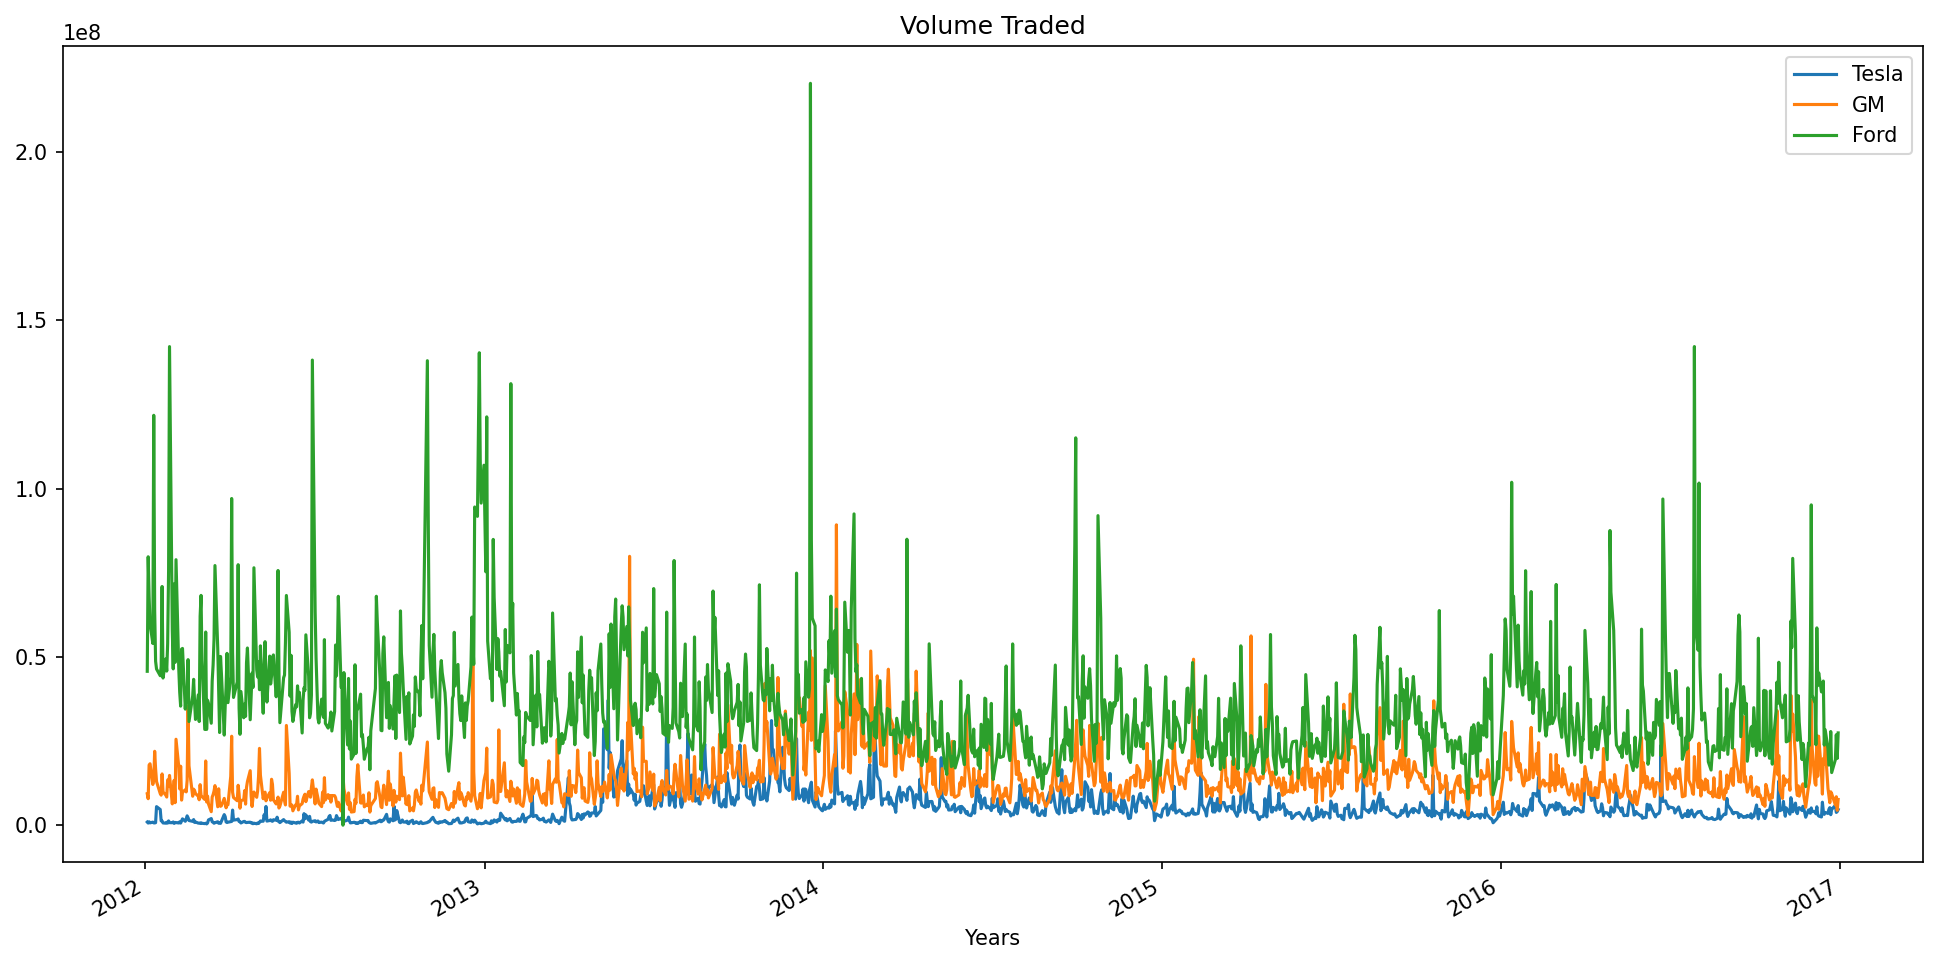

In [6]:
#Visualizing The Volume Of Stock Traded Each Day
plt.figure(figsize = (16,8) , dpi = 150)
tesla['Volume'].plot(label='Tesla')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.title('Volume Traded')
plt.xlabel('Years')
plt.legend();

We can see there is a spike in Volume Traded of Ford in late 2013.

In [7]:
#timeStamp for this Spike
ford.iloc[ford['Volume'].argmax()]


Open      1.599000e+01
High      1.600000e+01
Low       1.517000e+01
Close     1.565000e+01
Volume    2.203628e+08
Name: 2013-12-18 00:00:00, dtype: float64

The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series

In [8]:
#Visualizing The Total Market Capacity of the Company
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

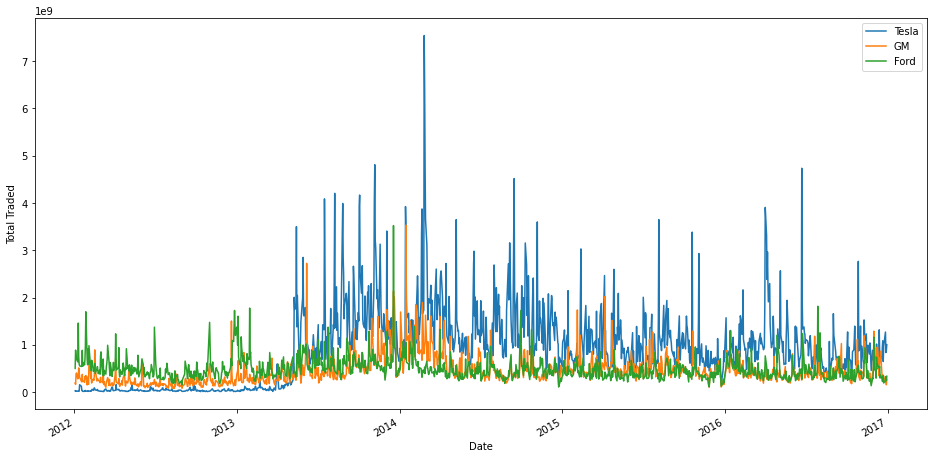

In [9]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded');

We can See there is a huge spike in Total Stocks traded of Tesla in Early 2014.

In [10]:
tesla.iloc[tesla['Total Traded'].argmax()]

Open            2.300000e+02
High            2.592000e+02
Low             2.284500e+02
Close           2.480000e+02
Volume          3.279700e+07
Total Traded    7.543310e+09
Name: 2014-02-25 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

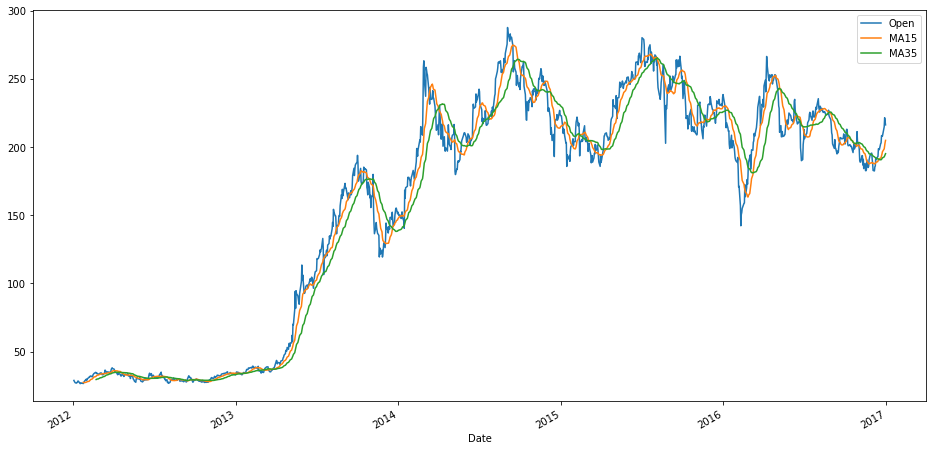

In [11]:
#Visualizing Open Price With Moving Averages (35 , 15) For Tesla
tesla['MA15'] = tesla['Open'].rolling(15).mean()
tesla['MA35'] = tesla['Open'].rolling(35).mean()
tesla[['Open','MA15','MA35']].plot(label='TLSA',figsize=(16,8))

Now We will check if there is Any Correlation between stock of Two Comapanies(using Scatter Matrix and Heat_map), after all belong to same Industry

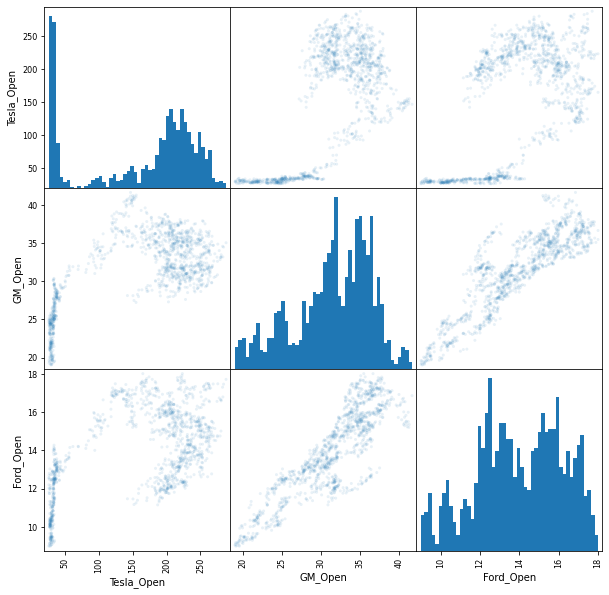

In [12]:
from pandas.plotting import scatter_matrix
matrix = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
matrix.columns = ['Tesla_Open','GM_Open','Ford_Open']
#scatter Matrix
scatter_matrix(matrix,figsize=(10,10),alpha=0.1,hist_kwds={'bins':50});

<AxesSubplot:>

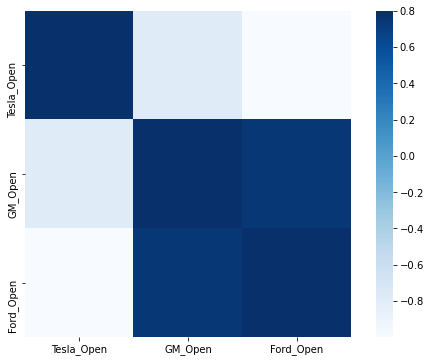

In [14]:
#Heat_map
import seaborn as sns
matrix = matrix.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="Blues")

As seen from Scatter_matrix Open Prices for Ford And Gm are highly Correlated

# candlestick Chart 

<Figure size 7500x3750 with 0 Axes>

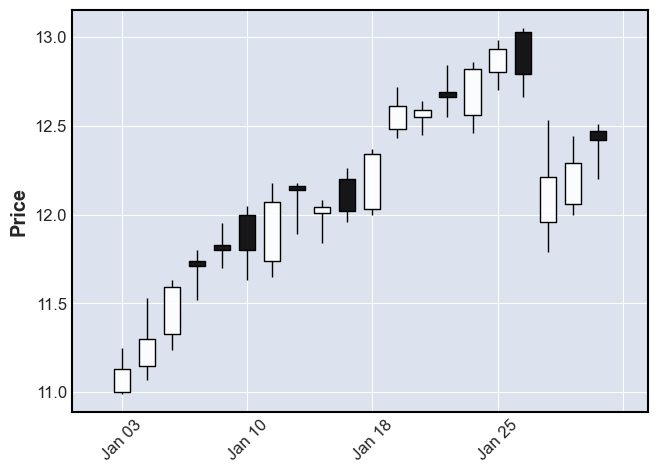

In [19]:
# Create a CandleStick chart for Ford in January 2012 using mpl_finance
import mplfinance as mpf
plt.figure(figsize = (30,15) , dpi = 250)

plt.style.use('ggplot')
mpf.plot(ford.loc['2012-01':'2012-01']  ,type='candle')

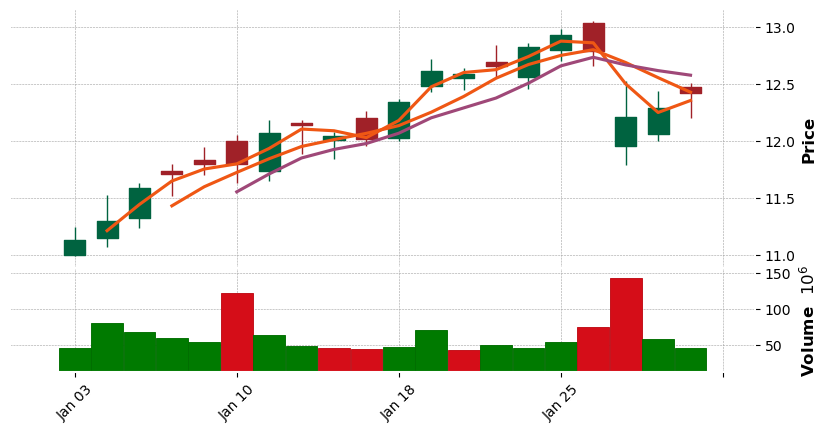

In [21]:
#creating A more detailed Candlestick Chart with Moving Averages (2 , 4 and 6) along with Volume Traded
kwargs = dict(type='candle',mav=(2,4,6),volume=True,figratio=(30,15),figscale=0.9)
mpf.plot(ford.loc['2012-01':'2012-01'],**kwargs,style='charles')

# Basic Financial Analysis

# Daily Percentage Change

In [23]:
#using pct_change for 1 day
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

<AxesSubplot:>

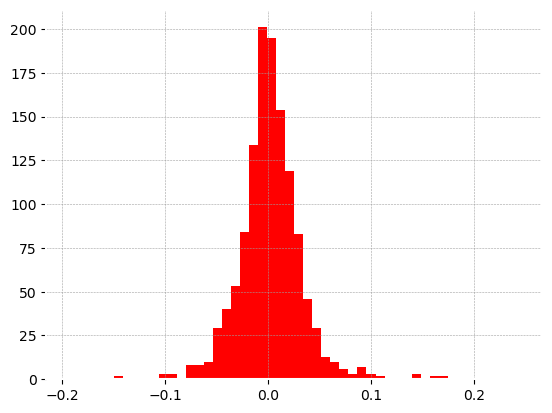

In [39]:
# we will plot Histograms to Visualize the Volatility of A stock. More Wider The Distribution more Volatile a stock is.
# More volatile a stock is more drastically prices of stock can change (high_risk , high_reward)
tesla['returns'].hist(bins = 50 , color = 'red')

<AxesSubplot:>

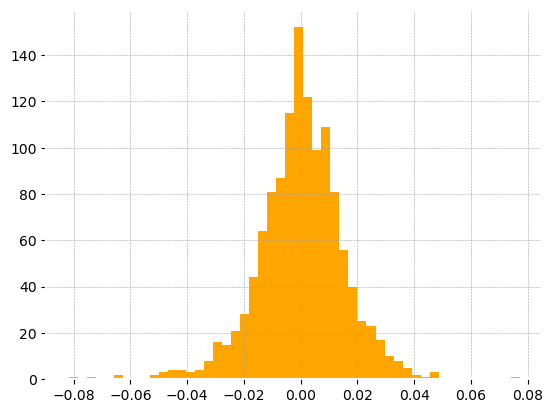

In [40]:
ford['returns'].hist(bins=50 , color = 'orange')

<AxesSubplot:>

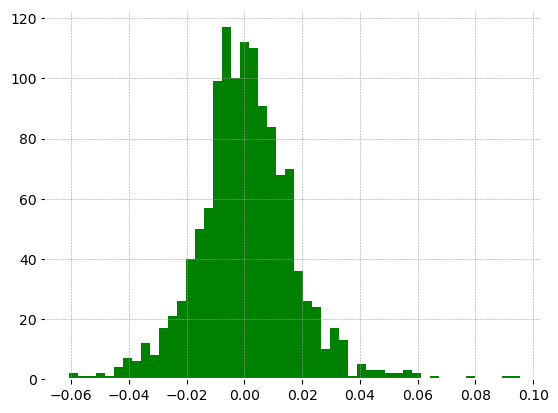

In [41]:
gm['returns'].hist(bins=50 , color = 'green')

plotting All three histograms At top of one Another for better Visalization

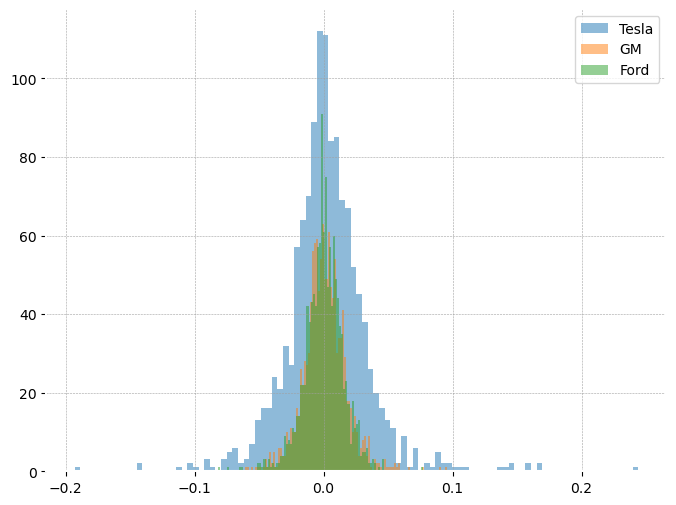

In [50]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(8,6),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

returns of Tesla are more widely Distributed ,that means Stocks of Tesla are more Volatile than Ford and Gm . We can plot kernel density estimation to verify the same

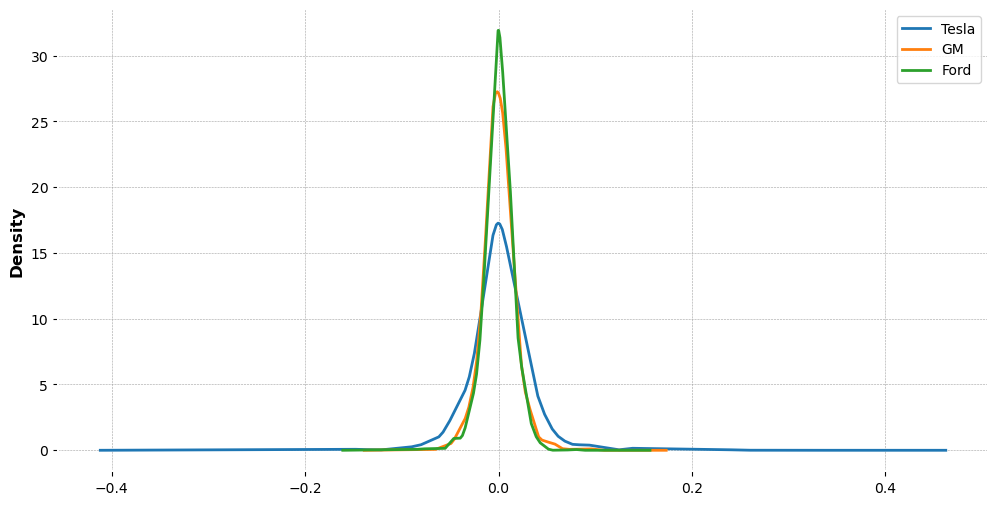

In [51]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

#  Comparing Daily Returns between Stocks

We will use a scatter_matrix to visualize correlation between Companies wrt to Returns. This well help us to understand how related the car companies are.

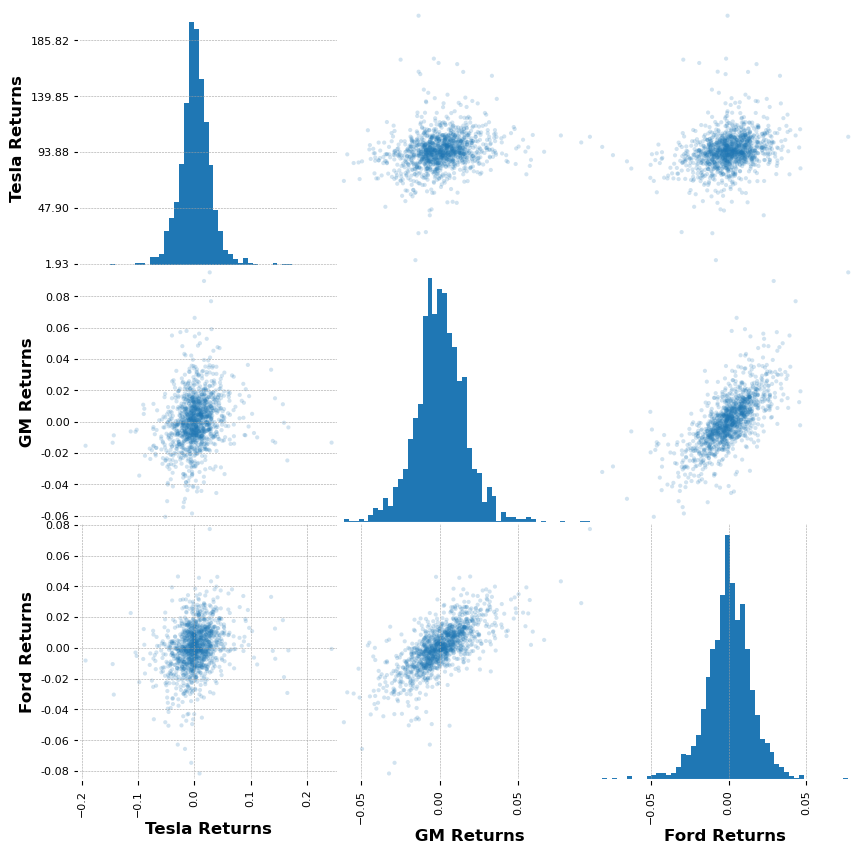

In [66]:
matrix = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
matrix.columns = ['Tesla Returns',' GM Returns','Ford Returns']
from matplotlib.ticker import FormatStrFormatter

axes = scatter_matrix(matrix, alpha=0.2, figsize=(10,10) , hist_kwds={'bins':50})
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 

As it can be seen Gm and Ford tend to correlate.

# Cumulative Daily Returns

A cumulative return is the aggregate amount an investment has gained or lost over time , independent of the period of time involved

In [67]:
tesla['Cumulative_Return'] = (1 + tesla['returns']).cumprod()
gm['Cumulative_Return'] = (1 + gm['returns']).cumprod()
ford['Cumulative_Return'] = (1 + ford['returns']).cumprod()

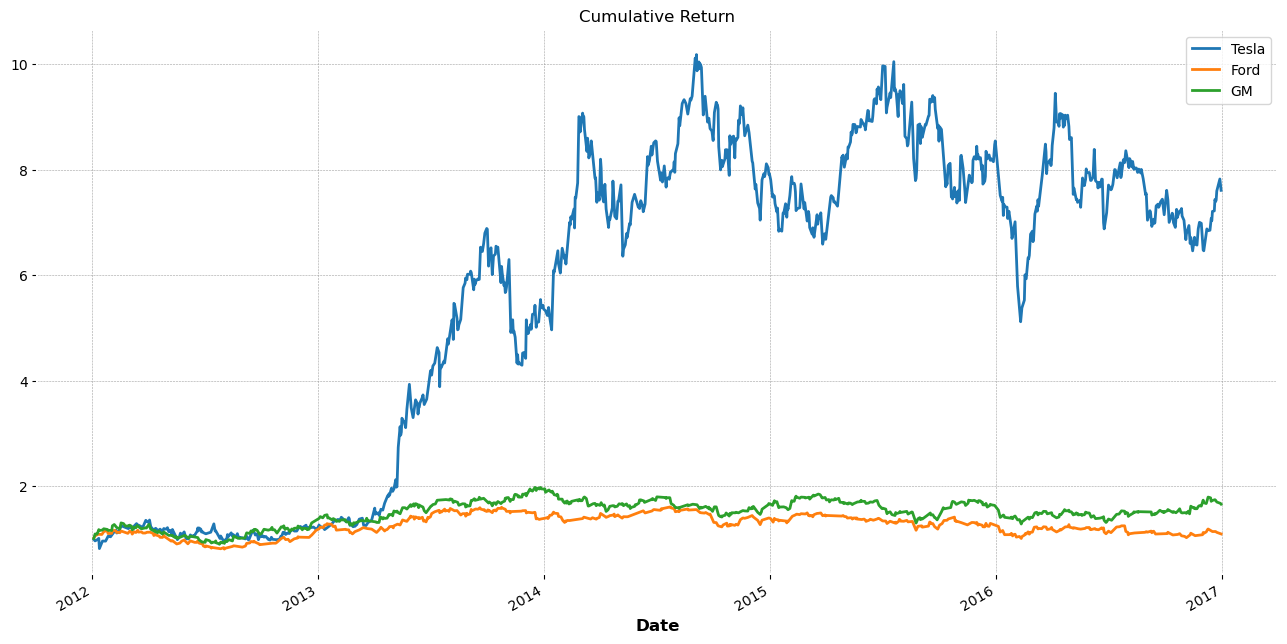

In [69]:
#visualizing Cumulative_return
tesla['Cumulative_Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative_Return'].plot(label='Ford')
gm['Cumulative_Return'].plot(label='GM')
plt.legend();